<a href="https://colab.research.google.com/github/souhila98/Reducing-car-hijacking-in-South-Africa-using-machine-learning/blob/main/Omdena_SA_Carjacking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Gather with Snscrape

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Some Dependencies
!pip install snscrape
!pip install --upgrade pip
!pip install transformers
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached transformers-4.24.0-py3-none-any.whl (5.5 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.5/163.5 kB 15.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd


search_query = "southafrica hijacking"
#(from:@stolenvehicleza) until:2022-09-01 since:2016-08-01'
tweets = []
tweet_limit = 10000

for tweet in sntwitter.TwitterSearchScraper(search_query).get_items():
    if len(tweets) == tweet_limit:
        break
    else:
        tweets.append([tweet.date,tweet.id,tweet.content,tweet.username])
        
df = pd.DataFrame(tweets, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])

path = '/content/drive/My Drive/southafrica/southafricahijacking.csv'
with open(path, 'w') as f:
  df.to_csv(f)


In [ ]:
search_query = "car hijack south africa"
#(from:@stolenvehicleza) until:2022-09-01 since:2016-08-01'
tweets = []
tweet_limit = 10000

for tweet in sntwitter.TwitterSearchScraper(search_query).get_items():
    if len(tweets) == tweet_limit:
        break
    else:
              tweets.append([tweet.date,tweet.id,tweet.content,tweet.username])
        
df1 = pd.DataFrame(tweets, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])
path = '/content/drive/My Drive/southafrica/car hijack south africa.csv'
with open(path, 'w') as f:
  df1.to_csv(f)



In [ ]:
#import the modules
import os
import pandas as pd
#read the path
file_path = "/content/drive/MyDrive/southafrica"
#list all the files from the directory
file_list = os.listdir(file_path)
file_list

['southafricahijacking.csv', 'car hijack south africa.csv']

In [ ]:
list = ['Datetime', 'Tweet Id', 'Text', 'Username']
df_master = df.merge(df1,
                   on = list, 
                   how = 'outer')
df_master

,Datetime,Tweet Id,Text,Username
0,2022-11-15 16:07:12+00:00,1592549788368932865,Hijacking syndicates have progressed from oper...,Radio702
1,2022-11-15 15:31:09+00:00,1592540715355377664,South Africa! My country people and hijacking ...,Lulahermanda
2,2022-11-15 06:33:35+00:00,1592405432781635586,So many potholes in WC. According to Bheki Cel...,repair_mags
3,2022-11-14 20:58:06+00:00,1592260607298121728,@muller_lyn @aron_hyman @SundayTimesZA @NickiG...,ProudlyMsTee
4,2022-11-14 18:47:38+00:00,1592227775041376256,@csiscanada @CIA @FBI @POTUS we realized that ...,realgabeangel
...,...,...,...,...
4863,2011-11-23 10:02:55+00:00,139282772559794176,Car hijack victim's nightmare. http://t.co/2Y...,MarcLisa_Trivia
4864,2011-11-17 10:28:13+00:00,137114812617469952,DTN South Africa: Car hijack victim's nightmar...,DTNSouthAfrica
4865,2010-09-09 06:37:41+00:00,23986758284,Hijack suspect arrested aftr car chase:The 25-...,timesSAguardian
4866,2010-09-07 08:22:38+00:00,23220194045,#dysfunctional #southafrica - Robbers hijack p...,fromtheold


In [ ]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForTokenClassification

tokenizer = AutoTokenizer.from_pretrained("Jean-Baptiste/camembert-ner")
model = AutoModelForTokenClassification.from_pretrained("Jean-Baptiste/camembert-ner")

nlp = pipeline('ner', model=model, tokenizer=tokenizer, aggregation_strategy="simple")

locations = []

for text in df_master['Text']:
  foundLocation = False
  foundCar = False
  doc = nlp(text)
  for ent in doc:
    #print(ent.label_)
    if ent['entity_group'] == 'LOC' and foundLocation == False:
      locations.append(ent['word'])
      foundLocation = True
  if (foundLocation == False):
    locations.append(pd.NA)

df_master['Locations'] = locations
path = '/content/drive/My Drive/data.csv'
with open(path, 'w') as f:
  df_master.to_csv(f)



Downloading:   0%|          | 0.00/269 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/892 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/811k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/210 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
data = pd.read_csv('/content/drive/My Drive/data.csv')
data

,Unnamed: 0,Datetime,Tweet Id,Text,Username,Locations
0,0,2022-11-15 16:07:12+00:00,1592549788368932865,Hijacking syndicates have progressed from oper...,Radio702,South Africa
1,1,2022-11-15 15:31:09+00:00,1592540715355377664,South Africa! My country people and hijacking ...,Lulahermanda,South Africa
2,2,2022-11-15 06:33:35+00:00,1592405432781635586,So many potholes in WC. According to Bheki Cel...,repair_mags,WC
3,3,2022-11-14 20:58:06+00:00,1592260607298121728,@muller_lyn @aron_hyman @SundayTimesZA @NickiG...,ProudlyMsTee,South Africa
4,4,2022-11-14 18:47:38+00:00,1592227775041376256,@csiscanada @CIA @FBI @POTUS we realized that ...,realgabeangel,South Africa
...,...,...,...,...,...,...
4864,4863,2011-11-23 10:02:55+00:00,139282772559794176,Car hijack victim's nightmare. http://t.co/2Y...,MarcLisa_Trivia,NaN
4865,4864,2011-11-17 10:28:13+00:00,137114812617469952,DTN South Africa: Car hijack victim's nightmar...,DTNSouthAfrica,South
4866,4865,2010-09-09 06:37:41+00:00,23986758284,Hijack suspect arrested aftr car chase:The 25-...,timesSAguardian,NaN
4867,4866,2010-09-07 08:22:38+00:00,23220194045,#dysfunctional #southafrica - Robbers hijack p...,fromtheold,NaN


In [ ]:
data['Locations'].unique()


array(['South Africa', 'WC', 'Midstream Mediclinic', nan, 'C',
       'Dobsonville', 'SouthAfrica', 'Mozambican/Zimbabwean', 'Africa',
       'Zimbabweans', 'Chines', 'Nigerians', 'Nigerian', 'South africa',
       'Potchefstroom South Africa', 'Melville JHB South Africa',
       'South Africans', 'South African', 'West', 'Soweto', 'Durban',
       'Zimbabwe', 'MYANC', 'German', 'Limpopo', 'White River',
       "South Africa's Progress", 'Nigeria', 'Mozambican', 'Cape Town',
       'Kenya', 'Brodzaa', 'South Africa Zimbabweans', 'Zimbabwean',
       'Graham', 'Pakistan', 'SA', 'Somalia', '#SouthAfrica',
       'Kwazulu-Natal', 'AFRICA', 'South Africa RE', 'Country in Africa',
       'Mozambicans', 'Jonga South Africa', 'KwaZulu',
       'South Africa Africa', 'Mexican', 'Africans', 'US', 'Sam',
       'south africa', 'africa', 'JHB Auckland Park South Africa',
       'attalion PA', 'AFRICA Nigerians', 'Kempton', 'Israel', 'Lesotho',
       'Railway Station', 'Beloved Country', 'South',

In [ ]:
data = data[['Datetime','Text','Locations']]

In [ ]:
def tweet_per_day(data):
  data['Datetime']= pd.to_datetime(data['Datetime'])
  return data['Text'].groupby(data['Datetime'].dt.date).count()

In [ ]:
tweet_per_day(data)

Datetime
2008-09-07    1
2009-03-04    1
2009-03-19    1
2009-03-20    1
2009-03-27    1
             ..
2022-11-09    3
2022-11-10    1
2022-11-12    1
2022-11-14    2
2022-11-15    3
Name: Text, Length: 2081, dtype: int64

In [ ]:
print('Folowing are the top 20 tweeted days:')
print(data['Text'].groupby(data['Datetime'].dt.date).count().nlargest(20))

Folowing are the top 20 tweeted days:
Datetime
2017-03-12    67
2014-06-06    61
2018-05-29    33
2022-07-28    31
2015-07-17    30
2013-09-12    29
2020-08-20    29
2020-08-23    29
2017-06-08    28
2018-06-01    25
2019-09-03    25
2014-07-22    20
2013-11-18    19
2014-09-17    18
2017-05-17    18
2019-09-04    18
2016-09-06    17
2017-08-25    17
2017-09-04    17
2018-09-13    16
Name: Text, dtype: int64


In [ ]:
data = df_master.Text
data

0       Hijacking syndicates have progressed from oper...
1       South Africa! My country people and hijacking ...
2       So many potholes in WC. According to Bheki Cel...
3       @muller_lyn @aron_hyman @SundayTimesZA @NickiG...
4       @csiscanada @CIA @FBI @POTUS we realized that ...
                              ...                        
4863    Car hijack victim's nightmare.  http://t.co/2Y...
4864    DTN South Africa: Car hijack victim's nightmar...
4865    Hijack suspect arrested aftr car chase:The 25-...
4866    #dysfunctional #southafrica - Robbers hijack p...
4867    This stuff doesn't only happen in South Africa...
Name: Text, Length: 4868, dtype: object

In [ ]:
!pip install cleantext
!pip install autocorrect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622383 sha256=9ed38b021c853c3128da7d412322ac289fabe963e6c9dee0c7e7b1da747b9e61
  Stored in directory: /root/.cache/pip/wheels/df/59/04/cc1520fa0644648667e8fd5dad4cf7a51f08b630f1dec39961
Successfully built autocorrect


# DATA CLEANING
1. Clear of HTML characters
2. Removing URLs, Hashtags and Styles
3. Contraction Replacement
4. Split attached word
5. Normalize text
6. Slang lookup
7. Standardizing and Spell Check
8. Remove Stopwords
9. Remove Punctuations



In [ ]:
import re
from cleantext import clean
from nltk.corpus import stopwords
import itertools
from autocorrect import Speller
from html.parser import HTMLParser
Apos_dict={"'s":" is","n't":" not","'m":" am","'ll":" will","'d":" would","'ve":" have","'re":" are"}
#file = open("C:/Users/Pctec/Download/slang.txt", "r")
#slang=file.read()
def clean_data(text):
    text = HTMLParser().unescape(text)
    text = re.sub(r"#", "", text)
    text = re.sub(r"^RT[\s]+", "", text)
    text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)
    for key,value in Apos_dict.items():
        if key in text:
            text=text.replace(key,value)
    text = " ".join([s for s in re.split("([A-Z][a-z]+[^A-Z]*)",text) if s])
    text = text.lower()
    text = ''.join(''.join(s)[:2] for _, s in itertools.groupby(text))
    spell = Speller(lang='en')
    text=spell(text)

    return text
round1 = lambda x: clean_data(x)

In [ ]:
data_clean = pd.DataFrame(data.apply(round1))
data_clean

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: The unescape method is deprecated and will be removed in 3.5, use html.unescape() instead.
  # This is added back by InteractiveShellApp.init_path()


,Text
0,hijacking syndicates have progressed from oper...
1,south africa my country people and hijacking...
2,so many potholes in wc according to bei ce...
3,mullerlyn aronhyman sunday times za nicki gu...
4,csiscanada cia fbi pots we realized that blac...
...,...
4863,car hijack victims nightmare south africa crime
4864,don south africa car hijack victims nightma...
4865,hijack suspect arrested after car chase the 25...
4866,dysfunctional southafrica robbers hijack poli...


### Tokenization

In [ ]:
from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+')

data_clean['Text_token']=data_clean['Text'].apply(regexp.tokenize)
data_clean.head(3)

,Text,Text_token
0,hijacking syndicates have progressed from oper...,"[hijacking, syndicates, have, progressed, from..."
1,south africa my country people and hijacking...,"[south, africa, my, country, people, and, hija..."
2,so many potholes in wc according to bei ce...,"[so, many, potholes, in, wc, according, to, be..."


###Remove stop words



In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")

# Extend the list with your own custom stopwords
my_stopwords = ['ect','the','a']
stopwords.extend(my_stopwords)
data_clean['Text_token'] = data_clean['Text_token'].apply(lambda x: [item for item in x if item not in stopwords])
data_clean.head(3)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Text,Text_token
0,hijacking syndicates have progressed from oper...,"[hijacking, syndicates, progressed, operating,..."
1,south africa my country people and hijacking...,"[south, africa, country, people, hijacking, dr..."
2,so many potholes in wc according to bei ce...,"[many, potholes, wc, according, bei, cell, oe,..."


### Remove infrequent words

In [ ]:
#keep only words which are longer than 2 letters
data_clean['Text_string'] = data_clean['Text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

In [ ]:
all_words = ' '.join([word for word in data_clean['Text_string']])

In [ ]:
import nltk
nltk.download('punkt')
tokenized_words = nltk.tokenize.word_tokenize(all_words)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from nltk.probability import FreqDist

fdist = FreqDist(tokenized_words)
fdist

FreqDist({'south': 5066, 'africa': 5022, 'hijacking': 4617, 'crime': 712, 'car': 693, 'hijack': 364, 'via': 336, 'cars': 332, 'vehicle': 309, 'people': 297, ...})

In [ ]:
#drop words which occur less than a certain amount of times (usually we use a value of 3 or 4).
data_clean['Text_string_fdist']=data_clean['Text_token'].apply(lambda x: ' '.join([item for item in x if fdist[item]>=3]))

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()

data_clean['Text_string_lem'] = data_clean['Text_string_fdist'].apply(wordnet_lem.lemmatize)

In [ ]:
data_clean['equal'] = (data_clean['Text_string_fdist']==data_clean['Text_string_lem'])

In [ ]:
data_clean

,Text,Text_token,Text_string,Text_string_fdist,Text_string_lem,equal
0,hijacking syndicates have progressed from oper...,"[hijacking, syndicates, progressed, operating,...",hijacking syndicates progressed operating inte...,hijacking syndicates operating moving outside ...,hijacking syndicates operating moving outside ...,True
1,south africa my country people and hijacking...,"[south, africa, country, people, hijacking, dr...",south africa country people hijacking driving ...,south africa country people hijacking driving ...,south africa country people hijacking driving ...,True
2,so many potholes in wc according to bei ce...,"[many, potholes, wc, according, bei, cell, oe,...",many potholes according bei cell crimes gone w...,many potholes according bei cell crimes gone w...,many potholes according bei cell crimes gone w...,True
3,mullerlyn aronhyman sunday times za nicki gu...,"[mullerlyn, aronhyman, sunday, times, za, nick...",mullerlyn aronhyman sunday times nicki gules d...,sunday times thank everyone coming south afric...,sunday times thank everyone coming south afric...,True
4,csiscanada cia fbi pots we realized that blac...,"[csiscanada, cia, fbi, pots, realized, black, ...",csiscanada cia fbi pots realized black panther...,pots black going groups south africa access hi...,pots black going groups south africa access hi...,True
...,...,...,...,...,...,...
4863,car hijack victims nightmare south africa crime,"[car, hijack, victims, nightmare, south, afric...",car hijack victims nightmare south africa crime,car hijack victims nightmare south africa crime,car hijack victims nightmare south africa crime,True
4864,don south africa car hijack victims nightma...,"[south, africa, car, hijack, victims, nightmar...",south africa car hijack victims nightmare feel...,south africa car hijack victims nightmare feel...,south africa car hijack victims nightmare feel...,True
4865,hijack suspect arrested after car chase the 25...,"[hijack, suspect, arrested, car, chase, 25year...",hijack suspect arrested car chase 25yearly man...,hijack suspect arrested car chase man arrested...,hijack suspect arrested car chase man arrested...,True
4866,dysfunctional southafrica robbers hijack poli...,"[dysfunctional, southafrica, robbers, hijack, ...",dysfunctional southafrica robbers hijack polic...,southafrica robbers hijack police car,southafrica robbers hijack police car,True


In [ ]:
text = data_clean['Text']
path = '/content/drive/My Drive/southafrica/text.csv'
with open(path, 'w') as f:
  text.to_csv(f)

In [ ]:
text_token = data_clean['Text_token']
path = '/content/drive/My Drive/southafrica/text_token.csv'
with open(path, 'w') as f:
  text_token.to_csv(f)

In [ ]:
!pip install wordcloud


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


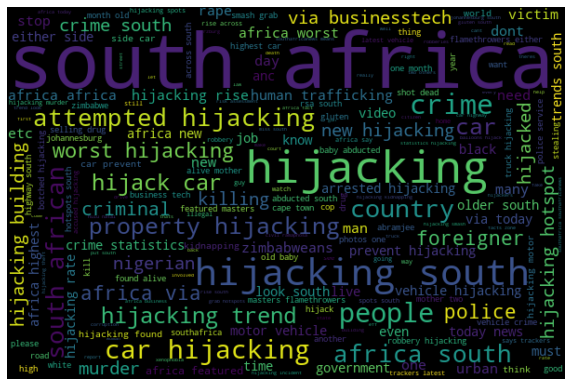

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud
all_words_lem = ' '.join([word for word in data_clean['Text_string_lem']])

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [ ]:
words = nltk.word_tokenize(all_words_lem)
fd = FreqDist(words)

In [ ]:
fd.most_common(5)


[('south', 5066),
 ('africa', 5022),
 ('hijacking', 4617),
 ('crime', 712),
 ('car', 693)]

In [ ]:
# Obtain top 10 words
top_10 = fd.most_common(10)

# Create pandas series to make plotting easier
fdist = pd.Series(dict(top_10))

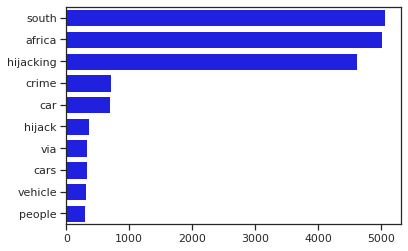

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.barplot(y=fdist.index, x=fdist.values, color='blue');